In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import requests
import time
import json
import os
from pprint import pprint

In [361]:
#loading the CSV file and reading 
clean_crime_data = pd.read_csv("data/clean_crimeData.csv")

In [362]:
#Display dataframe
clean_crime_data.head()

,CCN,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,START_DATE,...,Lat,Log,year,month,day,hour,minute,second,quad,crimetype
0,8123749,EVENING,OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,8/30/2008 21:30,...,-77.070209,38.913633,2008,8,31,20,47,0,Northwest,Non-Violent
1,8123824,MIDNIGHT,THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,8/31/2008 19:30,...,-77.045323,38.908564,2008,9,1,0,45,0,Northwest,Non-Violent
2,8123835,MIDNIGHT,OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,8/31/2008 23:00,...,-77.027045,38.899057,2008,9,1,3,0,0,Northeast,Non-Violent
3,8127848,DAY,OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,9/9/2008 7:10,...,-77.040089,38.909638,2008,9,9,7,46,0,Northwest,Non-Violent
4,8120153,EVENING,THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,8/5/2008 12:00,...,-77.019377,38.894573,2008,8,24,20,0,0,Northeast,Non-Violent


## 	Assess Crime across years in DC area

In [363]:
#Create groups & bins to cut the dataframe
bins = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
group_names = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

In [364]:
#make a copy of the clean dataframe
clean_crime_bin = clean_crime_data[0:len(clean_crime_data)].copy()

#change the 'year' column type as integer
clean_crime_bin['year']=clean_crime_bin.year.astype('int64')

#binning of dataframe
clean_crime_bin["Year"] = pd.cut(clean_crime_bin["year"], bins, labels=group_names)

#grouby year
CrimeMethod_Cnt = pd.DataFrame(clean_crime_bin.groupby(["Year","METHOD"])["CCN"].count())
CrimeMethod_Cnt

CCN
Year METHOD       
2008 GUN      2345
     KNIFE    1036
     OTHERS  27780
2009 GUN      2010
     KNIFE    1170
     OTHERS  28400
2010 GUN      1875
     KNIFE    1183
     OTHERS  30493
2011 GUN      2210
     KNIFE    1321
     OTHERS  31837
2012 GUN      2204
     KNIFE    1263
     OTHERS  32429
2013 GUN      1961
     KNIFE    1282
     OTHERS  35181
2014 GUN      2193
     KNIFE    1171
     OTHERS  33897
2015 GUN      2125
     KNIFE    1013
     OTHERS  34030
2016 GUN      1283
     KNIFE     707
     OTHERS  26034

In [365]:
# Minor Data Munging to Re-Format the Data Frames
CMtrans = CrimeMethod_Cnt.pivot_table(columns='METHOD', index='Year', values='CCN')
CMPivoted_df = pd.DataFrame(CMtrans)
CMPivoted_df

METHOD,GUN,KNIFE,OTHERS
Year,,,
2008,2345,1036,27780
2009,2010,1170,28400
2010,1875,1183,30493
2011,2210,1321,31837
2012,2204,1263,32429
2013,1961,1282,35181
2014,2193,1171,33897
2015,2125,1013,34030
2016,1283,707,26034


In [366]:
#get all columns
cols = CMPivoted_df.columns[:]
cols

#change year (index) into numeric
CMPivoted_df.index = pd.to_numeric(CMPivoted_df.index)
print(CMPivoted_df.index)

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Year')


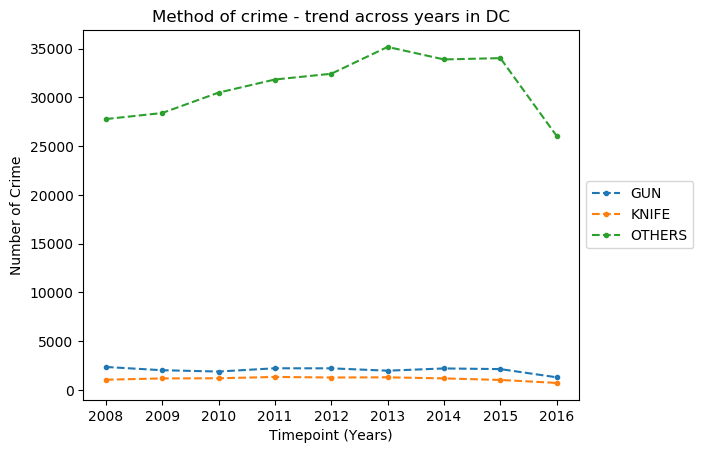

In [367]:
#plot line graph in loop
for i in cols:
    plt.plot(CMPivoted_df.index,CMPivoted_df[i],linestyle="dashed",marker='.')

#Setting legend, label
plt.title('Method of crime - trend across years in DC')
plt.xlabel("Timepoint (Years)")
plt.ylabel("Number of Crime")
plt.legend(cols, loc='center left',bbox_to_anchor=(1, .5))
plt.savefig("Method of crime_trend.jpg",bbox_inches = "tight")
plt.style.use("default")

In [368]:
#binning dataframe
CrimeType_Cnt = pd.DataFrame(clean_crime_bin.groupby(["Year","crimetype"])["CCN"].count())
CrimeType_Cnt

CCN
Year crimetype         
2008 Non-Violent  24772
     Violent       6389
2009 Non-Violent  25284
     Violent       6296
2010 Non-Violent  26967
     Violent       6584
2011 Non-Violent  28421
     Violent       6947
2012 Non-Violent  29108
     Violent       6788
2013 Non-Violent  32258
     Violent       6166
2014 Non-Violent  31021
     Violent       6240
2015 Non-Violent  31447
     Violent       5721
2016 Non-Violent  24260
     Violent       3764

In [369]:
# Minor Data Munging to Re-Format the Data Frames
CTtrans = CrimeType_Cnt.pivot_table(columns='crimetype', index='Year', values='CCN')
CrimeType_Cnt = pd.DataFrame(CTtrans)
CrimeType_Cnt

crimetype,Non-Violent,Violent
Year,,
2008,24772,6389
2009,25284,6296
2010,26967,6584
2011,28421,6947
2012,29108,6788
2013,32258,6166
2014,31021,6240
2015,31447,5721
2016,24260,3764


In [370]:
#get list of columns
cols = CrimeType_Cnt.columns[:]
cols

#convert index into numeric
CrimeType_Cnt.index = pd.to_numeric(CrimeType_Cnt.index)
print(CrimeType_Cnt.index)

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Year')


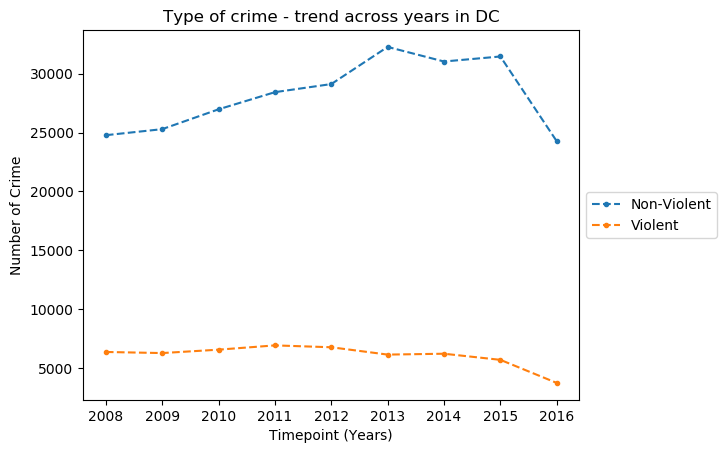

In [371]:
#plot graph in loop
for i in cols:
    plt.plot(CrimeType_Cnt.index,CrimeType_Cnt[i],linestyle="dashed",marker='.')

#set legend, label for the graph
plt.title('Type of crime - trend across years in DC')
plt.xlabel("Timepoint (Years)")
plt.ylabel("Number of Crime")
plt.legend(cols, loc='center left',bbox_to_anchor=(1, .5))
plt.savefig("Type of crime_trend.jpg",bbox_inches = "tight")

## At what time of the day crime happens most

In [372]:
#create binds & groups
bins = [0, 5, 11, 17, 23]
group_names = ["0 to 5","6 to 11","12 to 17","18 to 23"]

In [373]:
#copy clean dataframe 
crime_hour_bin = clean_crime_data[0:len(clean_crime_data)].copy()
crime_hour_bin

,CCN,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,START_DATE,...,Lat,Log,year,month,day,hour,minute,second,quad,crimetype
0,8123749,EVENING,OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,8/30/2008 21:30,...,-77.070209,38.913633,2008,8,31,20,47,0,Northwest,Non-Violent
1,8123824,MIDNIGHT,THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,8/31/2008 19:30,...,-77.045323,38.908564,2008,9,1,0,45,0,Northwest,Non-Violent
2,8123835,MIDNIGHT,OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,8/31/2008 23:00,...,-77.027045,38.899057,2008,9,1,3,0,0,Northeast,Non-Violent
3,8127848,DAY,OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,9/9/2008 7:10,...,-77.040089,38.909638,2008,9,9,7,46,0,Northwest,Non-Violent
4,8120153,EVENING,THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,8/5/2008 12:00,...,-77.019377,38.894573,2008,8,24,20,0,0,Northeast,Non-Violent
5,8120189,EVENING,OTHER,OTHERS,G STREET NW AND 12TH STREET NW,1.0,105.0,2,2C,8/24/2008 16:30,...,-77.028078,38.898315,2008,8,24,21,40,0,Northeast,Non-Violent
6,8120280,MIDNIGHT,OTHER,OTHERS,1000 - 1099 BLOCK OF 26TH STREET NW,2.0,207.0,2,2A,8/24/2008 23:30,...,-77.054750,38.903264,2008,8,25,6,0,0,Northwest,Non-Violent
7,8123978,DAY,BURGLARY,OTHERS,1707 - 1799 BLOCK OF S STREET NW,3.0,301.0,2,2B,8/31/2008 17:30,...,-77.040472,38.914088,2008,9,1,13,30,0,Northwest,Non-Violent
8,8123989,DAY,OTHER,OTHERS,1300 - 1699 BLOCK OF CONNECTICUT AVENUE NW,3.0,308.0,2,2B,9/1/2008 13:20,...,-77.043607,38.909927,2008,9,1,14,0,0,Northwest,Non-Violent
9,8124024,EVENING,OTHER,OTHERS,3RD STREET SW AND MARYLAND AVENUE SW,1.0,102.0,2,2C,9/1/2008 15:15,...,-77.015172,38.888185,2008,9,1,17,10,0,Southeast,Non-Violent


In [374]:
#bin copied dataframe
crime_hour_bin["hour"] = pd.cut(crime_hour_bin["hour"], bins, labels=group_names)
CrimeTime_Cnt = pd.DataFrame(crime_hour_bin.groupby(["hour"])["CCN"].count())
CrimeTime_Cnt

,CCN
hour,
0 to 5,36974
6 to 11,77656
12 to 17,116921
18 to 23,99830


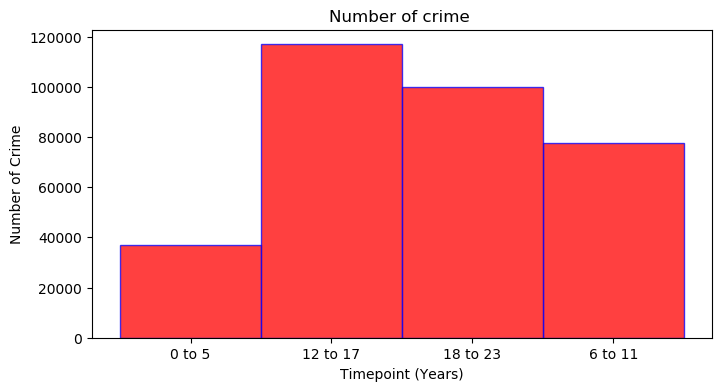

In [375]:
#plot graph
plt.figure(figsize=(8,4))
plt.bar(CrimeTime_Cnt.index,CrimeTime_Cnt["CCN"],color='r',alpha=.75,align="center", width=1,edgecolor ="b")

#set legend & label
plt.title('Number of crime ')
plt.xlabel("Timepoint (Years)")
plt.ylabel("Number of Crime")
plt.savefig("Method of crime_trend.jpg",bbox_inches = "tight")

In [376]:
#bins & groups
bins = [0, 5, 11, 17, 23]
group_names = ["0 to 5","6 to 11","12 to 17","18 to 23"]

#copy dataframe
crime_hour_bin = clean_crime_data[0:len(clean_crime_data)].copy()
crime_hour_bin

#bin & group dataframe
crime_hour_bin["hour"] = pd.cut(crime_hour_bin["hour"], bins, labels=group_names)
Offense_Cnt = pd.DataFrame(crime_hour_bin.groupby(["hour", "OFFENSE"])["CCN"].count())
Offense_Cnt

CCN
hour     OFFENSE                          
0 to 5   ARSON                          87
         ASSAULT W/DANGEROUS WEAPON   5608
         BURGLARY                     3154
         OTHER                        8326
         ROBBERY                      7578
         SEX ABUSE                     478
         THEFT                       11743
6 to 11  ARSON                          65
         ASSAULT W/DANGEROUS WEAPON   2885
         BURGLARY                     6847
         OTHER                       26550
         ROBBERY                      4257
         SEX ABUSE                     483
         THEFT                       36569
12 to 17 ARSON                          86
         ASSAULT W/DANGEROUS WEAPON   5397
         BURGLARY                    10337
         OTHER                       51788
         ROBBERY                      8193
         SEX ABUSE                     610
         THEFT                       40510
18 to 23 ARSON                          76
         ASSAULT W/DANGEROUS WEAPON   8280
         BURGLARY                    10082
         OTHER                       40817
         ROBBERY                     13199
         SEX ABUSE                     644
         THEFT                       26732

In [377]:
# Minor Data Munging to Re-Format the Data Frames
OFFtrans = Offense_Cnt.pivot_table(columns='OFFENSE', index='hour', values='CCN')
Offense_Cnt = pd.DataFrame(OFFtrans)
Offense_Cnt

OFFENSE,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,OTHER,ROBBERY,SEX ABUSE,THEFT
hour,,,,,,,
0 to 5,87,5608,3154,8326,7578,478,11743
6 to 11,65,2885,6847,26550,4257,483,36569
12 to 17,86,5397,10337,51788,8193,610,40510
18 to 23,76,8280,10082,40817,13199,644,26732


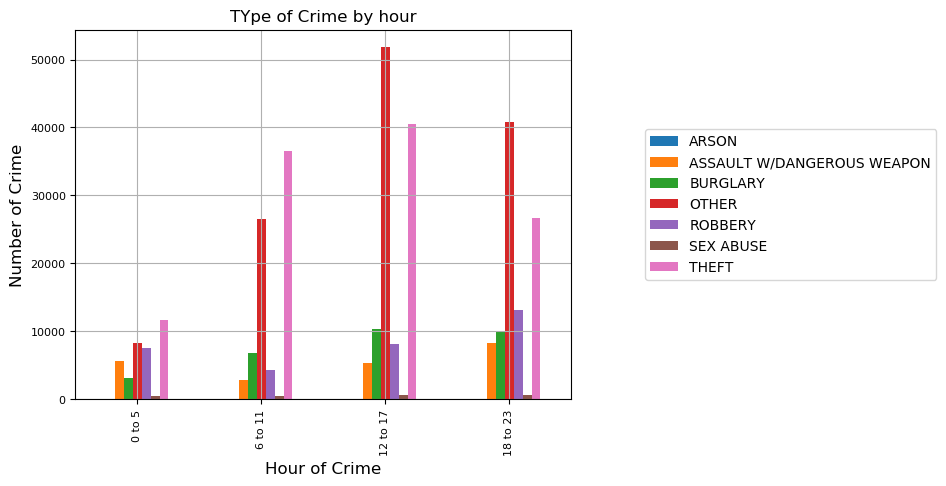

In [378]:
#plot multibar
Offense_Cnt.plot.bar()
plt.title('TYpe of Crime by hour')

#set tick size
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

#set label
plt.ylabel("Number of Crime", fontsize=12)
plt.xlabel("Hour of Crime", fontsize=12)

#display legend in box outside the plot area
plt.legend(loc=0, bbox_to_anchor=(1.75, 0.75
                                 ))
#show & save the chart
plt.grid()
plt.show()
plt.savefig("TYpe of Crime by hour.jpg",bbox_inches = "tight")